### Downsample data to reduce underfitting

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
data = pd.read_csv("flood_data_nn.csv")

In [4]:
# use label encoder to bin values ranging from 0-2734 into 5 classes
# 0 = very low flood risk 5 = very high flood risk
# turn labels into float values for regression 

label_encoder = LabelEncoder()

In [5]:
y = label_encoder.fit_transform(pd.cut(data['flood_den'], 5, retbins=True)[0])

In [6]:
# check intervals
label_encoder.classes_

array([Interval(-2.734, 546.8, closed='right'),
       Interval(546.8, 1093.6, closed='right'),
       Interval(1093.6, 1640.4, closed='right'),
       Interval(1640.4, 2187.2, closed='right'),
       Interval(2187.2, 2734.0, closed='right')], dtype=object)

In [7]:
# dataset imbalance --> bias
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([8578962,  494414,   67697,   15028,    6021], dtype=int64))

In [8]:
# replace unscaled y with new y
data['flood_den'] = y

In [9]:
# Random Downsample so all 'classes' equal to class 3 except class 4
# Class count
count_class_0, count_class_1,count_class_2, count_class_3, count_class_4 = data.flood_den.value_counts()

# Divide by class
df_class_0 = data[data['flood_den'] == 0]
df_class_1 = data[data['flood_den'] == 1]
df_class_2 = data[data['flood_den'] == 2]
df_class_3 = data[data['flood_den'] == 3]
df_class_4 = data[data['flood_den'] == 4]

In [10]:
df_class_0_under = df_class_0.sample(count_class_3)
df_class_1_under = df_class_1.sample(count_class_3)
df_class_2_under = df_class_2.sample(count_class_3)

df = pd.concat([df_class_0_under, df_class_1_under, df_class_2_under, df_class_3, df_class_4], axis=0)

print('Random under-sampling:')
print(df.flood_den.value_counts())

Random under-sampling:
0    15028
1    15028
2    15028
3    15028
4     6021
Name: flood_den, dtype: int64


In [11]:
# save resampled data
df.to_csv('resampled_data.csv')

[Text(0.5, 1.0, 'Distribution y Before Resample')]

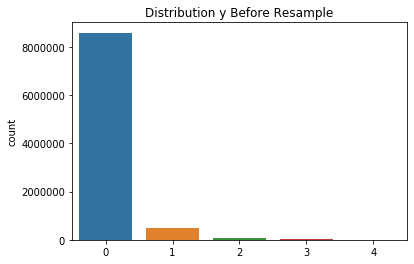

In [14]:
# plot y values
# most areas in new york = very low risk 
sns.countplot(x = y).set(title='Distribution y Before Resample')

[Text(0.5, 1.0, 'Distribution y After Resample')]

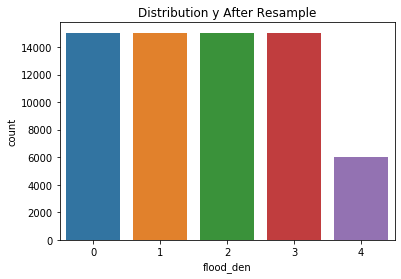

In [15]:
sns.countplot(x = df['flood_den']).set(title='Distribution y After Resample')